In [1]:
using Catalyst
ecomodel = @reaction_network begin
    α₁*(1 - 0.01*🐜 - 0.05*🐸), 🐜 --> 2🐜
    α₂*(1 - 0.1*🐬), 🐜 --> 🐸
    δ₁, 🐜 --> ∅
    δ₂, 🐸 --> 🐬
    δ₃, 🐬 --> ∅
    end α₁ α₂ δ₁ δ₂ δ₃


Model ##ReactionSystem#257 with 5 equations
States (3):
  🐜(t)
  🐸(t)
  🐬(t)
Parameters (5):
  α₁
  α₂
  δ₁
  δ₂
  δ₃

In [2]:
using Latexify
odes = convert(ODESystem, ecomodel)
latexify(odes)


L"\begin{align}
\frac{d🐜(t)}{dt} =& \alpha{_1} \left( 1 -0.01 🐜\left( t \right) -0.05 🐸\left( t \right) \right) 🐜\left( t \right) -1 \delta{_1} 🐜\left( t \right) -1 \alpha{_2} 🐜\left( t \right) \left( 1 -0.1 🐬\left( t \right) \right) \\
\frac{d🐸(t)}{dt} =& \alpha{_2} 🐜\left( t \right) \left( 1 -0.1 🐬\left( t \right) \right) -1 \delta{_2} 🐸\left( t \right) \\
\frac{d🐬(t)}{dt} =& \delta{_2} 🐸\left( t \right) -1 \delta{_3} 🐬\left( t \right)
\end{align}
"

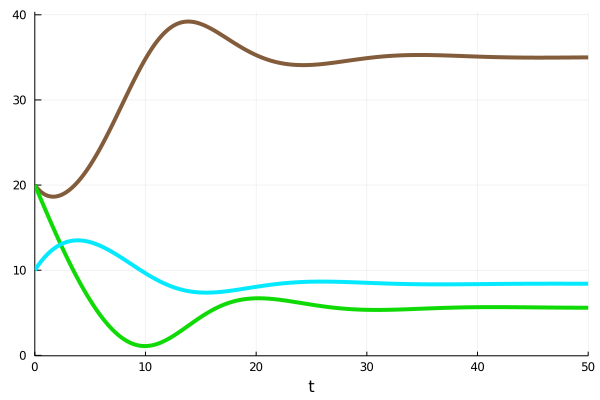

In [3]:
using DifferentialEquations, Plots

cc = ["#835C3B" "#10DA05" "#05E9FF"]

## Parameters [α₁ α₂ δ₁ δ₂ δ₃]
p = (0.2, 0.15, 0.05, 0.15, 0.1)
u₀ = [20., 20., 10.]
tspan = (0., 50.)

# create the ODEProblem 
ds = ODEProblem(ecomodel, u₀, tspan, p)

sol = solve(ds, Tsit5())
plot(sol, lw=4, lc=cc, legend=false)



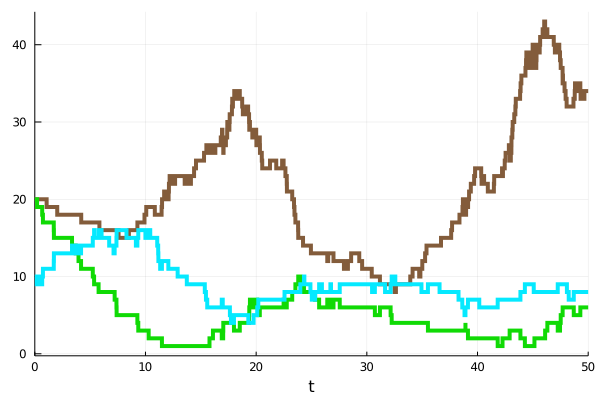

In [4]:
ds_discrete = DiscreteProblem(ecomodel, [20,20,10], tspan, p)
jump_ds = JumpProblem(ecomodel, ds_discrete, Direct())

sol = solve(jump_ds, SSAStepper())
plot(sol, lw=4, lc=cc, legend=false)


In [5]:
import SymPy 

🐜, 🐸, 🐬 = SymPy.@vars 🐜 🐸 🐬
α₁, α₂, δ₁, δ₂, δ₃, g₁, g₂, g₃ = SymPy.@vars α₁ α₂ δ₁ δ₂ δ₃ g₁ g₂ g₃

rhs = [α₁*🐜*(1 - g₁*🐜 - g₂*🐸) - α₂*🐜 - δ₁*🐜,
       α₂*🐜*(1 - g₃*🐬) - δ₂*🐸,
       δ₂*🐸 - δ₃*🐬]

fps = SymPy.solve(rhs, [🐜,🐸,🐬])


3-element Array{Tuple{SymPy.Sym,SymPy.Sym,SymPy.Sym},1}:
 (0, 0, 0)
 ((-g₁*α₁*δ₂*δ₃ - g₂*α₁*α₂*δ₃ + g₃*α₁*α₂*δ₂ - g₃*α₂^2*δ₂ - g₃*α₂*δ₁*δ₂ - sqrt(g₁^2*α₁^2*δ₂^2*δ₃^2 + 2*g₁*g₂*α₁^2*α₂*δ₂*δ₃^2 + 2*g₁*g₃*α₁^2*α₂*δ₂^2*δ₃ - 2*g₁*g₃*α₁*α₂^2*δ₂^2*δ₃ - 2*g₁*g₃*α₁*α₂*δ₁*δ₂^2*δ₃ + g₂^2*α₁^2*α₂^2*δ₃^2 - 2*g₂*g₃*α₁^2*α₂^2*δ₂*δ₃ + 2*g₂*g₃*α₁*α₂^3*δ₂*δ₃ + 2*g₂*g₃*α₁*α₂^2*δ₁*δ₂*δ₃ + g₃^2*α₁^2*α₂^2*δ₂^2 - 2*g₃^2*α₁*α₂^3*δ₂^2 - 2*g₃^2*α₁*α₂^2*δ₁*δ₂^2 + g₃^2*α₂^4*δ₂^2 + 2*g₃^2*α₂^3*δ₁*δ₂^2 + g₃^2*α₂^2*δ₁^2*δ₂^2))/(2*g₁*g₃*α₁*α₂*δ₂), (g₁*α₁*δ₂*δ₃ + g₂*α₁*α₂*δ₃ + g₃*α₁*α₂*δ₂ - g₃*α₂^2*δ₂ - g₃*α₂*δ₁*δ₂ + sqrt(g₁^2*α₁^2*δ₂^2*δ₃^2 + 2*g₁*g₂*α₁^2*α₂*δ₂*δ₃^2 + 2*g₁*g₃*α₁^2*α₂*δ₂^2*δ₃ - 2*g₁*g₃*α₁*α₂^2*δ₂^2*δ₃ - 2*g₁*g₃*α₁*α₂*δ₁*δ₂^2*δ₃ + g₂^2*α₁^2*α₂^2*δ₃^2 - 2*g₂*g₃*α₁^2*α₂^2*δ₂*δ₃ + 2*g₂*g₃*α₁*α₂^3*δ₂*δ₃ + 2*g₂*g₃*α₁*α₂^2*δ₁*δ₂*δ₃ + g₃^2*α₁^2*α₂^2*δ₂^2 - 2*g₃^2*α₁*α₂^3*δ₂^2 - 2*g₃^2*α₁*α₂^2*δ₁*δ₂^2 + g₃^2*α₂^4*δ₂^2 + 2*g₃^2*α₂^3*δ₁*δ₂^2 + g₃^2*α₂^2*δ₁^2*δ₂^2))/(2*g₂*g₃*α₁*α₂*δ₂), (g₁*α₁*δ₂*δ₃ + g₂*α₁*α₂*δ₃ 

In [6]:
J = rhs.jacobian([🐜,🐸,🐬])


3×3 Array{SymPy.Sym,2}:
 -g₁⋅α₁⋅🐜 + α₁⋅(-g₁⋅🐜 - g₂⋅🐸 + 1) - α₂ - δ₁  -g₂⋅α₁⋅🐜         0
                             α₂⋅(-g₃⋅🐬 + 1)       -δ₂  -g₃⋅α₂⋅🐜
                                          0        δ₂       -δ₃

In [7]:
## Select a fixed point
nfp = 2

## Substitute fixed point values [x1,x2,x3]
J_fp = J.subs([(🐜,fps[nfp][1]),(🐸,fps[nfp][2]),(🐬,fps[nfp][3])])


3×3 Array{SymPy.Sym,2}:
 α₁*(1 - (-g₁*α₁*δ₂*δ₃ - g₂*α₁*α₂*δ₃ + g₃*α₁*α₂*δ₂ - g₃*α₂^2*δ₂ - g₃*α₂*δ₁*δ₂ - sqrt(g₁^2*α₁^2*δ₂^2*δ₃^2 + 2*g₁*g₂*α₁^2*α₂*δ₂*δ₃^2 + 2*g₁*g₃*α₁^2*α₂*δ₂^2*δ₃ - 2*g₁*g₃*α₁*α₂^2*δ₂^2*δ₃ - 2*g₁*g₃*α₁*α₂*δ₁*δ₂^2*δ₃ + g₂^2*α₁^2*α₂^2*δ₃^2 - 2*g₂*g₃*α₁^2*α₂^2*δ₂*δ₃ + 2*g₂*g₃*α₁*α₂^3*δ₂*δ₃ + 2*g₂*g₃*α₁*α₂^2*δ₁*δ₂*δ₃ + g₃^2*α₁^2*α₂^2*δ₂^2 - 2*g₃^2*α₁*α₂^3*δ₂^2 - 2*g₃^2*α₁*α₂^2*δ₁*δ₂^2 + g₃^2*α₂^4*δ₂^2 + 2*g₃^2*α₂^3*δ₁*δ₂^2 + g₃^2*α₂^2*δ₁^2*δ₂^2))/(2*g₃*α₁*α₂*δ₂) - (g₁*α₁*δ₂*δ₃ + g₂*α₁*α₂*δ₃ + g₃*α₁*α₂*δ₂ - g₃*α₂^2*δ₂ - g₃*α₂*δ₁*δ₂ + sqrt(g₁^2*α₁^2*δ₂^2*δ₃^2 + 2*g₁*g₂*α₁^2*α₂*δ₂*δ₃^2 + 2*g₁*g₃*α₁^2*α₂*δ₂^2*δ₃ - 2*g₁*g₃*α₁*α₂^2*δ₂^2*δ₃ - 2*g₁*g₃*α₁*α₂*δ₁*δ₂^2*δ₃ + g₂^2*α₁^2*α₂^2*δ₃^2 - 2*g₂*g₃*α₁^2*α₂^2*δ₂*δ₃ + 2*g₂*g₃*α₁*α₂^3*δ₂*δ₃ + 2*g₂*g₃*α₁*α₂^2*δ₁*δ₂*δ₃ + g₃^2*α₁^2*α₂^2*δ₂^2 - 2*g₃^2*α₁*α₂^3*δ₂^2 - 2*g₃^2*α₁*α₂^2*δ₁*δ₂^2 + g₃^2*α₂^4*δ₂^2 + 2*g₃^2*α₂^3*δ₁*δ₂^2 + g₃^2*α₂^2*δ₁^2*δ₂^2))/(2*g₃*α₁*α₂*δ₂)) - α₂ - δ₁ - (-g₁*α₁*δ₂*δ₃ - g₂*α₁*α₂*δ₃ + g₃*α₁*α₂*δ₂ - g₃*α₂^2*δ₂ - 

In [8]:
rhs

3-element Array{SymPy.Sym,1}:
 α₁⋅🐜⋅(-g₁⋅🐜 - g₂⋅🐸 + 1) - α₂⋅🐜 - δ₁⋅🐜
               α₂⋅🐜⋅(-g₃⋅🐬 + 1) - δ₂⋅🐸
                           δ₂⋅🐸 - δ₃⋅🐬

In [9]:
## Substitute parameter values 
par = [0.2, 0.5, 0.5, 0.1, 0.7, 0.1, 0.05, 0.02]
J_eval = J_fp.subs([(α₁,par[1]),(α₂,par[2]),(δ₁,par[3]),(δ₂,par[4]),(δ₃,par[5]),(g₁,par[6]),(g₂,par[7]),(g₃,par[8])])


3×3 Array{SymPy.Sym,2}:
               1.87116274011642⋅√2 + 2.85  …                                  0
 0.207142857142857 - 0.267308962873775⋅√2     0.935581370058212⋅√2 + 1.425
                                             0                    -0.700000000000000

In [10]:
## Calculate eigenvalues 
eigs = J_eval.eigenvals()

## Find the stability of the fixed point 
is_stable = false
if maximum(real(collect(keys(eigs)))) < 0
    is_stable = true
end
is_stable


false

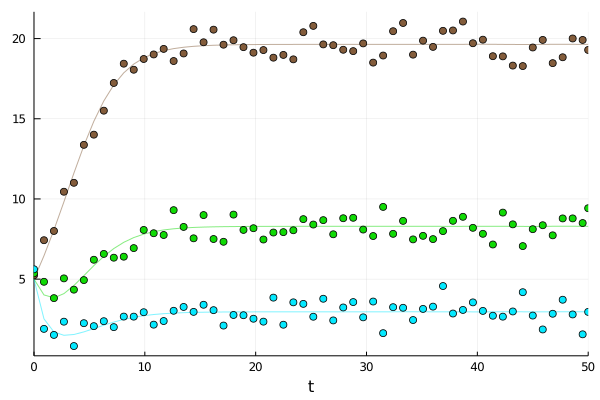

In [11]:
## Parameter inference
x0_inf = [5.; 5.; 5.]
p_inf = [0.8; 0.3; 0.1; 0.5; 1.4]
tspan = (0.0, 50.0)

ds = ODEProblem(ecomodel, x0_inf, tspan, p_inf)

sol = solve(ds,Tsit5(),saveat=.9)
targetdata = Array(sol) + 0.6*randn(size(Array(sol)))

plot(sol, alpha = 0.5, lc=cc, legend = false); scatter!(sol.t, targetdata', color=cc)


In [12]:
using Turing 
@model function fitmodel(data, ds)
    σ ~ InverseGamma(2, 3) 
    α₁ ~ truncated(Normal(1.0,1.0),0,3)
    α₂ ~ truncated(Normal(1.0,1.0),0,3)
    δ₁ ~ truncated(Normal(1.0,1.0),0,3)
    δ₂ ~ truncated(Normal(1.0,1.0),0,3)
    δ₃ ~ truncated(Normal(1.0,1.0),0,3)

    p = [α₁,α₂,δ₁,δ₂,δ₃]
    prob = remake(ds, p=p)
    predicted = solve(prob,Tsit5(),saveat=.9)

    for i = 1:length(predicted)
        data[:,i] ~ MvNormal(predicted[i], σ)
    end
end

model = fitmodel(targetdata, ds)
@time chain = mapreduce(c -> sample(model, NUTS(.7), 1000), chainscat, 1:4)


┌ Info: Precompiling Turing [fce5fe82-541a-59a6-adf8-730c64b5f9a0]
└ @ Base loading.jl:1278
┌ Warning: Module NonlinearSolve with build ID 4361878138270408 is missing from the cache.
│ This may mean NonlinearSolve [8913a72c-1f9b-4ce2-8d82-65094dcecaec] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1017
┌ Warning: Module NonlinearSolve with build ID 4361878138270408 is missing from the cache.
│ This may mean NonlinearSolve [8913a72c-1f9b-4ce2-8d82-65094dcecaec] does not support precompilation but is imported by a module that does.
└ @ Base loading.jl:1017
┌ Info: Skipping precompilation since __precompile__(false). Importing Turing [fce5fe82-541a-59a6-adf8-730c64b5f9a0].
└ @ Base loading.jl:1034
┌ Info: Precompiling Bijectors [76274a88-744f-5084-9051-94815aaf08c4]
└ @ Base loading.jl:1278
┌ Warning: Module NonlinearSolve with build ID 4361878138270408 is missing from the cache.
│ This may mean NonlinearSolve [8913a72c-1f9b-4ce2-8d82-65094dcec

207.538391 seconds (1.27 G allocations: 108.096 GiB, 10.27% gc time)


Chains MCMC chain (1000×18×4 Array{Float64,3}):

Iterations        = 1:1000
Thinning interval = 1
Chains            = 1, 2, 3, 4
Samples per chain = 1000
parameters        = α₁, α₂, δ₁, δ₂, δ₃, σ
internals         = acceptance_rate, hamiltonian_energy, hamiltonian_energy_error, is_accept, log_density, lp, max_hamiltonian_energy_error, n_steps, nom_step_size, numerical_error, step_size, tree_depth

Summary Statistics
  parameters      mean       std   naive_se      mcse         ess      rhat 
      Symbol   Float64   Float64    Float64   Float64     Float64   Float64 

          α₁    0.8359    0.0475     0.0008    0.0022    632.5532    1.0087
          α₂    0.3638    0.0682     0.0011    0.0034    527.7852    1.0093
          δ₁    0.0726    0.0332     0.0005    0.0016    582.5441    1.0068
          δ₂    0.6105    0.1162     0.0018    0.0059    530.9491    1.0093
          δ₃    1.6969    0.3247     0.0051    0.0162    541.8280    1.0084
           σ    0.6397    0.0348     0.0006  

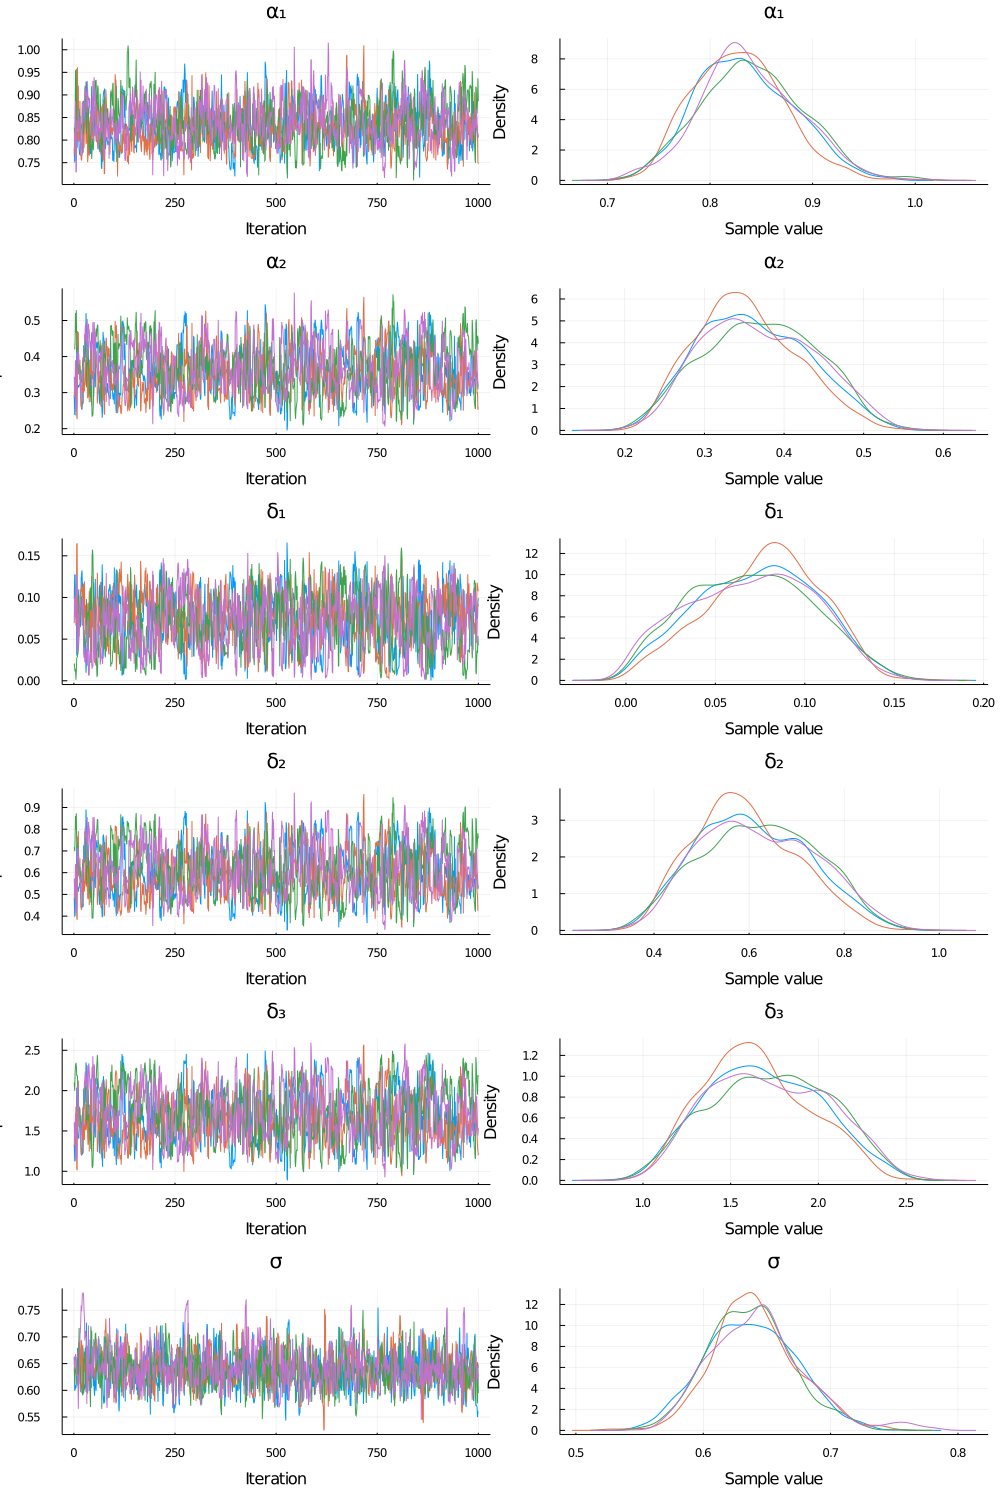

In [13]:
using StatsPlots
plot(chain)
